### Movies Dataset Sample Submission

This notebook will serve as a sample submission for this weekend's bonus challenge.  

You can use it as starter code to further develop any ideas you might have about how to develop your model.

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# import data sets
train = pd.read_csv('../../Data/movies/train.csv', parse_dates=['release_date'])
test  = pd.read_csv('../../Data/movies/test.csv', parse_dates=['release_date'])

In [3]:
# we'll save this variable for later 
test_idx = test['id'].values

In [4]:
# take a look at data types 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8866 entries, 0 to 8865
Data columns (total 19 columns):
id                      8866 non-null int64
popularity              8866 non-null float64
budget                  8866 non-null int64
original_title          8866 non-null object
cast                    8813 non-null object
homepage                2198 non-null object
director                8835 non-null object
tagline                 6681 non-null object
keywords                7819 non-null object
overview                8863 non-null object
runtime                 8866 non-null int64
genres                  8850 non-null object
production_companies    8049 non-null object
release_date            8866 non-null datetime64[ns]
vote_count              8866 non-null int64
vote_average            8866 non-null float64
release_year            8866 non-null int64
budget_adj              8866 non-null float64
revenue                 8866 non-null float64
dtypes: datetime64[ns](1), floa

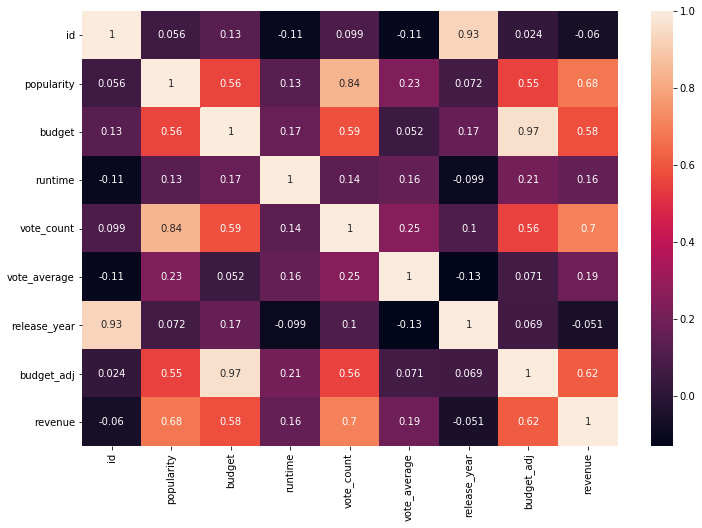

In [5]:
# and some initial correlations
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True);

In [6]:
# drop the id column, since it doesn't encode anything meaningful
train.drop('id', axis=1, inplace=True)

In [7]:
# we'll create a few columns for new features -- like what genre the movie was
train['genre'] = train['genres'].str.split('|').str[0].str.lower()

In [8]:
# let's do the same for test
test['genre'] = test['genres'].str.split('|').str[0].str.lower()

Next we'll do a little bit to get a feel for how time has passed throughout the dataset.

In [9]:
# get the most recent date in the dataset
max_date = test['release_date'].max()

In [10]:
# this encodes how many days ago from the most recent date the movie was
train['days_ago'] = (max_date - train['release_date']).dt.days

In [11]:
# ditto for the test set
test['days_ago'] = (max_date - test['release_date']).dt.days

Next we'll encode the data and then scale it.

In [12]:
# create a variable for y, and then drop it from the 
y = train['revenue']

In [13]:
# define X
X = train[['popularity', 'budget', 'runtime', 'vote_count', 'vote_average', 'budget_adj', 'days_ago', 'genre']]

In [14]:
# and redefine test in a similar manner -- remember, they have to match
test = test[['popularity', 'budget', 'runtime', 'vote_count', 'vote_average', 'budget_adj', 'days_ago', 'genre']]

In [15]:
# notice how we're concatenating them before we encode them  -- want both to have the same number of columns
data = pd.concat([X, test])

In [16]:
# now OneHot encode it
data = pd.get_dummies(data)

In [17]:
# and split it back apart
split_idx = len(X)
X, test = data[:split_idx].copy(), data[split_idx:].copy()

In [18]:
# next up we'll standardize our data -- notice how we use the mean and standard deviation of the training set for both
sc = StandardScaler()

# this scales the data -- we pass this result into pd.DataFrame() to remake it into a pandas dataframe
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
# and now we'll use the saved means and variances from the training set to transform the test set
test = pd.DataFrame(sc.transform(test), columns=test.columns)

C:\Users\Jonat\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [20]:
# initialize our algo, and cross validate it
lreg = LinearRegression()
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)

In [21]:
# and let's take a look at our scores -- notice any pattern?
scores

array([0.37032466, 0.41045371, 0.54153792, 0.5553933 , 0.71979385,
       0.73512124, 0.79229937, 0.72029128, 0.71761358, 0.72492225])

In [22]:
# and take their average -- notice how they're increasing with each fold?
np.mean(scores)

0.6287751147393679

In [23]:
# before we submit, let's go ahead and fit it on our entire training set
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# and finally let's build our submission file -- make sure your submissions have the same format!
predictions = pd.DataFrame({
    'id': test_idx,
    'prediction': lreg.predict(test)
})

In [25]:
# and output it to a csv_file -- this is what you're going to turn in
predictions.to_csv('submission.csv', index=False)

I'll leave it up to you to decide what to do next -- transforming variables?  Additional encoding of categoricals?  Extracting additional information from dates?  Comparing movie characteristics to their average?  Removing non-impactful training data entirely?  

The possibilities are endless!  

If you have a csv file to turn in with the columns set up the same way as the `predictions` dataframe, then this will suffice for the assignment, and will be graded at the beginning of class.